# Option 1: Pyber

---

In [53]:
%matplotlib inline

# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# load City data into a data frame
city_df = pd.read_csv('data/city_data.csv')
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [55]:
# load Ride data into a data frame
ride_df = pd.read_csv('data/ride_data.csv')
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [56]:
# combine data into a single dataset
merge_df = pd.merge(ride_df, city_df, on='city', how='left')
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

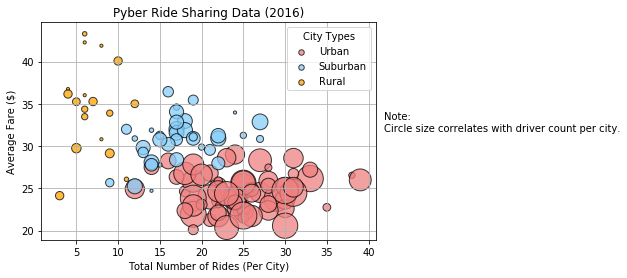

In [57]:
# Obtain the x and y coordinates for each of the three city types
urban_x = merge_df[merge_df['type']=='Urban'].groupby('city')['ride_id'].count()
urban_y = merge_df[merge_df['type']=='Urban'].groupby('city')['fare'].mean()
urban_circle_size = merge_df[merge_df['type']=='Urban'].groupby('city')['driver_count'].max()
suburban_x = merge_df[merge_df['type']=='Suburban'].groupby('city')['ride_id'].count()
suburban_y = merge_df[merge_df['type']=='Suburban'].groupby('city')['fare'].mean()
suburban_circle_size = merge_df[merge_df['type']=='Suburban'].groupby('city')['driver_count'].max()
rural_x = merge_df[merge_df['type']=='Rural'].groupby('city')['ride_id'].count()
rural_y = merge_df[merge_df['type']=='Rural'].groupby('city')['fare'].mean()
rural_circle_size = merge_df[merge_df['type']=='Rural'].groupby('city')['driver_count'].max()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker='o', facecolors='lightcoral', edgecolors='black',
            s=10*urban_circle_size, alpha=0.75, label='Urban')
plt.scatter(suburban_x, suburban_y, marker='o', facecolors='lightskyblue', edgecolors='black',
            s=10*suburban_circle_size, alpha=0.75, label='Suburban')
plt.scatter(rural_x, rural_y, marker='o', facecolors='orange', edgecolors='black',
            s=10*rural_circle_size, alpha=0.75, label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
lgnd = plt.legend(loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate('Note:\nCircle size correlates with driver count per city.',
             xy=(1.025, 0.5), xycoords='axes fraction')

# Save Figure
plt.savefig("Images/pyber_ride_sharing_data.png")

# Show plot
plt.show()

## Total Fares by City Type

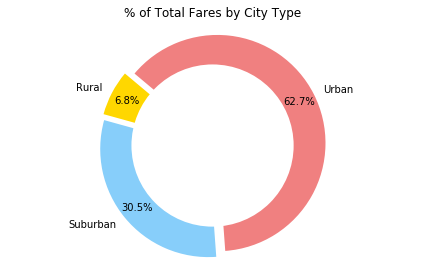

<Figure size 432x288 with 0 Axes>

In [74]:
# Calculate Type Percents
fares_by_city_type = merge_df.groupby('type')['fare'].sum()

# Build Pie Chart
plt.pie(fares_by_city_type, labels=fares_by_city_type.index,
        explode=(0.05, 0.05, 0.05),
        colors=['gold', 'lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', pctdistance=0.85, startangle=140)
plt.title('% of Total Fares by City Type')

# Convert Pie Chart to Donut Chart to make it more readable
centre_circle = plt.Circle((0,0),0.75,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

# Save Figure
plt.savefig("Images/pyber_fares_by_city_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

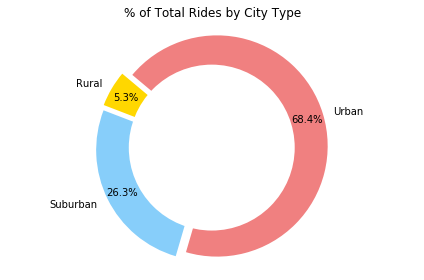

In [75]:
# Calculate Ride Percents
rides_by_city_type = merge_df.groupby('type')['ride_id'].count()

# Build Pie Chart
plt.pie(rides_by_city_type, labels=rides_by_city_type.index,
        explode=(0.05, 0.05, 0.05),
        colors=['gold', 'lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', pctdistance=0.85, startangle=140)
plt.title('% of Total Rides by City Type')

# Convert Pie Chart to Donut Chart to make it more readable
centre_circle = plt.Circle((0,0),0.75,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

# Save Figure
plt.savefig("Images/pyber_rides_by_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

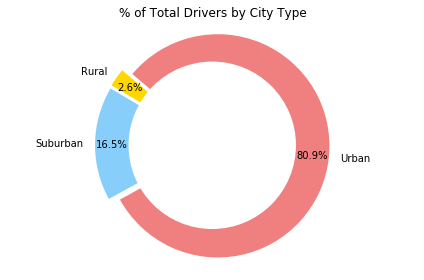

In [76]:
# Calculate Driver Percents
drivers_by_city_type = city_df.groupby('type')['driver_count'].sum()

# Build Pie Chart
plt.pie(drivers_by_city_type, labels=drivers_by_city_type.index,
        explode=(0.05, 0.05, 0.05),
        colors=['gold', 'lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', pctdistance=0.85, startangle=140)
plt.title('% of Total Drivers by City Type')

# Convert Pie Chart to Donut Chart to make it more readable
centre_circle = plt.Circle((0,0),0.75,fc='white')
plt.gcf().gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

# Save Figure
plt.savefig("Images/pyber_drivers_by_city_type.png")

# Show Figure
plt.show()